# Classical Convolutional Neural Networks (QCCNN) for detecting hand-written digits

In this notebook we train a classical Convolutional Neural Network to study what is the test accuracy that we obtainfor different architectures and training dataset size.




0. Import the necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time
from myQML import QCCNN

1. Load the MNIST dataset, selecting the number of training and test images, and then normalize the image pixels to values between 0 and 1.

In [ ]:
n_training_images = 1200
n_test_images = 300

mnist_dataset = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

train_images = train_images[:n_training_images]
train_labels = train_labels[:n_training_images]
test_images = test_images[:n_test_images]
test_labels = test_labels[:n_test_images] 

train_images = train_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis])
test_images = np.array(test_images[..., tf.newaxis])

np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

2. Define the parameters used for the CCNN training

In [3]:
learning_rate = 0.001  # Learning rate for the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)  # Optimizer for the classical model
loss = 'sparse_categorical_crossentropy'    # Loss function for the classical model

3. Define a the classical CNN model, including the architecture, loss function and optimizer

In [4]:
model = tf.keras.models.Sequential([

    # First convolutional layer
    tf.keras.layers.Conv2D(filters=50, kernel_size=(2, 2), activation='relu'),
            
    # First pooling layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second convolutional layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'),
    
    # Second pooling layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten to feed into dense layer
    tf.keras.layers.Flatten(),
    
    # Fully connected dense layer
    tf.keras.layers.Dense(64, activation='relu'),

    # Dropout layer to prevent overfitting
    tf.keras.layers.Dropout(0.2),
    
    # Final output layer with 10 units for classification
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
optimizer=optimizer,
loss=loss,
metrics=["accuracy"],
)


6. Train the classical convolutional neural network with the specified batch size and number of epochs

In [5]:
batch_size = 16
n_epochs = 60

history = model.fit(
                train_images,
                train_labels,
                validation_data=(test_images, test_labels),
                batch_size=batch_size,
                epochs=n_epochs,
                verbose=2
            )

print("Training of the classical convolutional neural network completed.")


Epoch 1/60
38/38 - 5s - 144ms/step - accuracy: 0.3867 - loss: 1.9093 - val_accuracy: 0.7267 - val_loss: 1.2190
Epoch 2/60
38/38 - 1s - 24ms/step - accuracy: 0.7433 - loss: 0.8810 - val_accuracy: 0.8133 - val_loss: 0.5931
Epoch 3/60
38/38 - 1s - 25ms/step - accuracy: 0.8433 - loss: 0.5447 - val_accuracy: 0.8667 - val_loss: 0.4271
Epoch 4/60
38/38 - 1s - 23ms/step - accuracy: 0.8900 - loss: 0.3783 - val_accuracy: 0.8867 - val_loss: 0.3431
Epoch 5/60
38/38 - 1s - 29ms/step - accuracy: 0.9100 - loss: 0.3026 - val_accuracy: 0.9333 - val_loss: 0.2449
Epoch 6/60
38/38 - 2s - 53ms/step - accuracy: 0.9250 - loss: 0.2487 - val_accuracy: 0.9333 - val_loss: 0.2271
Epoch 7/60
38/38 - 2s - 45ms/step - accuracy: 0.9500 - loss: 0.1959 - val_accuracy: 0.9133 - val_loss: 0.2521
Epoch 8/60
38/38 - 2s - 48ms/step - accuracy: 0.9500 - loss: 0.1508 - val_accuracy: 0.9400 - val_loss: 0.2179
Epoch 9/60
38/38 - 1s - 30ms/step - accuracy: 0.9633 - loss: 0.1117 - val_accuracy: 0.9333 - val_loss: 0.1744
Epoch 10/

7. Plot validation loss and validation accuracy

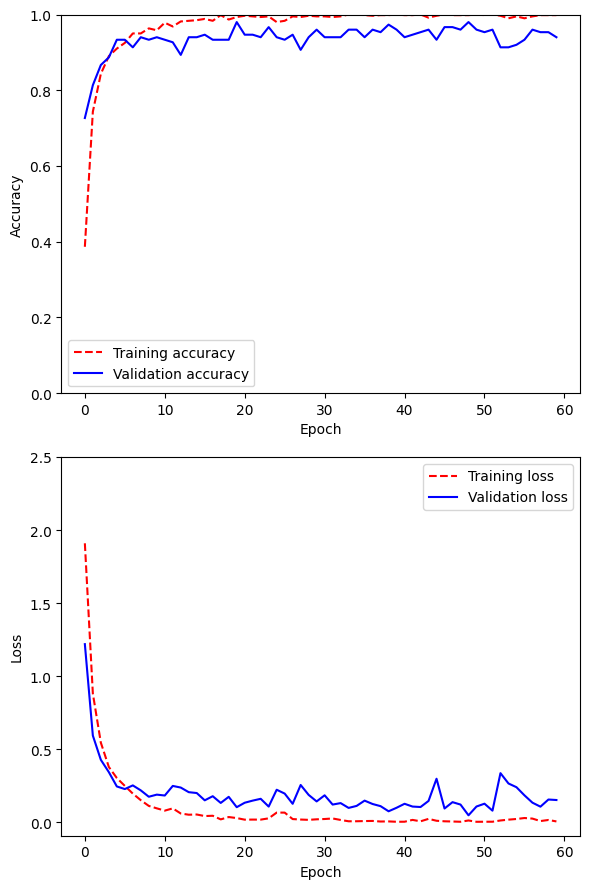

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(history.history["accuracy"], "--r", label="Training accuracy")
ax1.plot(history.history["val_accuracy"], "-b", label="Validation accuracy")    
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(history.history["loss"], "--r", label="Training loss")
ax2.plot(history.history["val_loss"], "-b", label="Validation loss")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()